**Objetivos da aula:**

*   Conhecer e praticar a Transformada de Hough para linhas e circulos
*   conhecer e praticar com os operadores de dilatação e erosão
*   conhecer e praticar com os operadores de abertura e fechamento

## Transformada de Hough

A `Transformada de Hough` é uma técnica de extração de características utilizada em processamento digital de imagens. Foi patenteada por `Paul Hough` em 1962 e posteriormente adaptada para detecção de formas geométricas em imagens digitais. A técnica é capaz de detecção de padrões geométricos em imagens, como linhas e círculos. Sendo particularmente útil quando:

- Os padrões estão parcialmente oclusos ou fragmentados
- Há ruído significativo na imagem
- Existem outros objetos ou características na imagem

### Conceito Fundamental

A ideia central da Transformada de Hough é transformar `pontos de uma imagem do espaço cartesiano` para `um espaço de parâmetros`, onde estruturas como linhas e círculos podem ser mais facilmente detectadas. Esta transformação permite identificar formas geométricas mesmo em imagens com ruído, oclusões parciais ou descontinuidades.

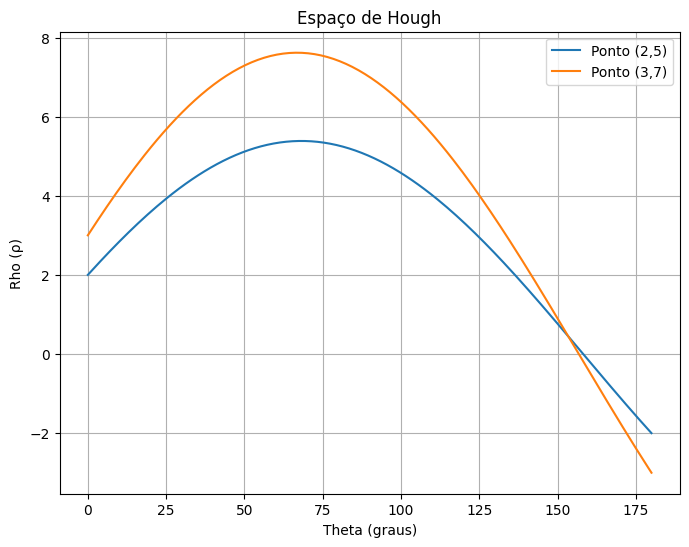

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# # reta (y = 2x + 1) 
# x = np.linspace(0, 5, 6)
# y1 = 2 * x + 1
# # Pontos discretizados
# pontos_reta1 = list(zip(x, y1))
# print(pontos_reta1)

# Pontos no espaço da imagem
pontos = [(2,5), (3,7)]


# Espaço de Hough (theta em graus)
thetas = np.linspace(0, 180, 180)
thetas_rad = np.deg2rad(thetas)

# Plotando as curvas para cada ponto
plt.figure(figsize=(8,6))
for x,y in pontos:
    rho = x*np.cos(thetas_rad) + y*np.sin(thetas_rad)
    plt.plot(thetas, rho, label=f"Ponto ({x},{y})")

# Destaque visual para interseção
plt.xlabel('Theta (graus)')
plt.ylabel('Rho (ρ)')
plt.title('Espaço de Hough')
plt.grid(True)
plt.legend()
plt.show()


### Desafio 0

Gerando os dados:

- Crie 2 retas diferentes, com equações diferentes (y=ax+b), garantindo que as retas não se cruzem.
- Para cada uma das 2 retas, escolha **6 pontos** distintos sobre cada reta. Você terá ao todo 12 pontos (6 pontos para cada reta).
- Mostre visualmente as duas retas e os 12 pontos selecionados no espaço (x,y).

Espaço de hough:

- Calcule e desenhe as curvas (ρ vs. θ) no espaço de Hough para cada um dos 12 pontos. Use um intervalo de 0° a 180° para θ.
- Analise visualmente o gráfico das curvas no espaço de Hough. Identifique claramente os pontos de interseção das curvas correspondentes aos pontos da mesma reta.





In [2]:
# Implemente sua solução aqui...





### Transformada de Hough para Detecção de Círculos


Um círculo pode ser representado pela equação:

```
(x - a)² + (y - b)² = r²
```

Onde:
- `(a, b)` é o centro do círculo
- `r` é o raio do círculo

### Espaço de Parâmetros Tridimensional

Para círculos, o espaço de parâmetros é tridimensional (a, b, r). Cada ponto de borda (x, y) na imagem original vota em um conjunto de pontos que formam um cone no espaço 3D.

### Algoritmo para Detecção de Círculos

1. **Pré-processamento**: Aplicar detecção de bordas.
2. **Inicialização**: Criar um acumulador tridimensional para (a, b, r).
3. **Votação**: Para cada ponto de borda (x, y) e para cada possível raio r:
   - Calcular os possíveis centros (a, b) usando as equações paramétricas
   - Incrementar o acumulador nas posições correspondentes
4. **Extração**: Identificar os máximos locais no acumulador 3D.
5. **Pós-processamento**: Filtrar e refinar os círculos detectados.

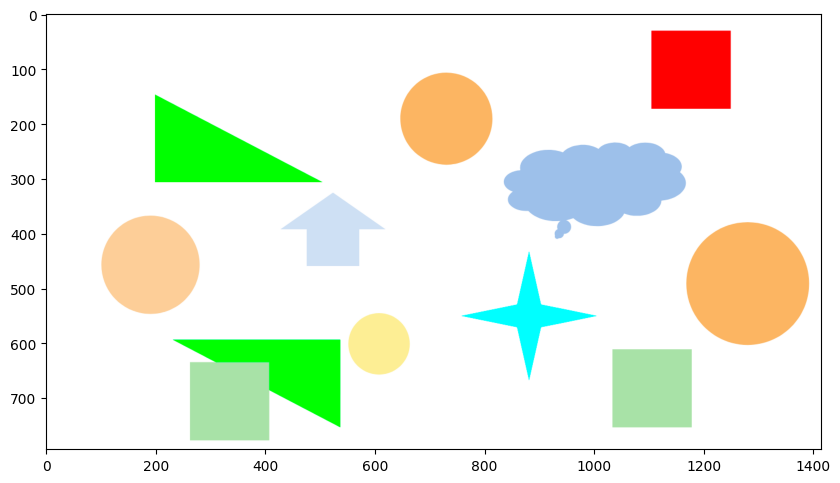

In [3]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('lab_images/formas.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(img); plt.show()

4


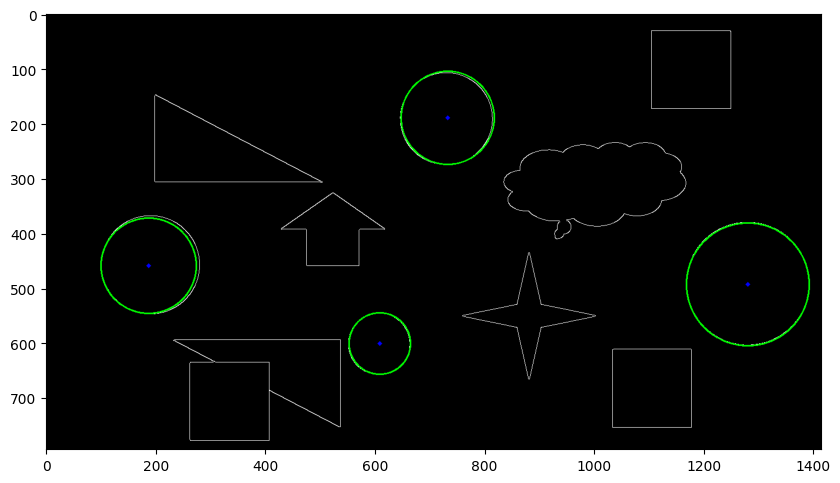

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(img_gray,50,150)

"""
Detecta círculos em uma imagem usando a Transformada de Hough

Parâmetros:
imagem (ndarray): Imagem de entrada
dp (float): Resolução do acumulador
minDist (int): Distância mínima entre os centros dos círculos detectados
param1 (int): Limiar superior para o detector de bordas Canny
param2 (int): Limiar do acumulador para centros de círculos
minRadius (int): Raio mínimo dos círculos
maxRadius (int): Raio máximo dos círculos

Retorno:
ndarray: Imagem com círculos detectados
"""
circles=cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,dp=2,minDist=100,param1=200,param2=100,minRadius=50,maxRadius=115)

bordas_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
output = bordas_rgb

print(len(circles[0]))
if circles is not None:        
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # desenha o contorno do circulo
        cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),2)
        # desenha no centro do circulo
        cv2.circle(output,(i[0],i[1]),2,(0,0,255),3)
        
plt.figure(figsize = (10,10))
plt.imshow(output, cmap="Greys_r", vmin=0, vmax=255); plt.show()

### Parâmetros da Transformada de Hough para Círculos

O resultado não ficou bom, pois há muitos falsos positivos detectados, neste caso precisamos alterar os parametros da transformada de hough. 

Vamos ver o que é cada um deles.


#### **Sintaxe:**

`
circles=cv2.HoughCircles(image,method=cv2.HOUGH_GRADIENT,dp,minDist,param1,param2,minRadius,maxRadius)
`

#### **Parâmetros:**
- **dp**: Relação entre o tamanho da imagem e o tamanho do acumulador. Um valor maior de dp detecta bordas mais tênues.
- **minDist**: Distância mínima entre os centros dos círculos detectados.
- **param1**: Valor do gradiente usado para detecção de bordas (limiar superior para o detector Canny).
- **param2**: Limiar do acumulador. Valores mais baixos detectam mais círculos (incluindo falsos positivos).
- **minRadius**: Raio mínimo dos círculos a serem detectados (em pixels).
- **maxRadius**: Raio máximo dos círculos a serem detectados (em pixels).

### DESAFIO 1

Faça a alteração dos parametros para a transformada de Hough afim de detectar apenas os circulos da imagem. 

Dica: Altere um parametro por vez e analise o resultado. 

In [5]:
# Implemente sua solução aqui...



### DESAFIO 2

Desenvolva um pipeline de processamento digital de imagens incluindo Transformada de Hough Circles para detectar moedas espalhadas sobre mesa. Note que o seu sistema deve ser capaz de diferenciar o valor da moeda por sua dimensão e contar quantas imagens de cada valor estão expostas. 

![](lab_images/coins.png)

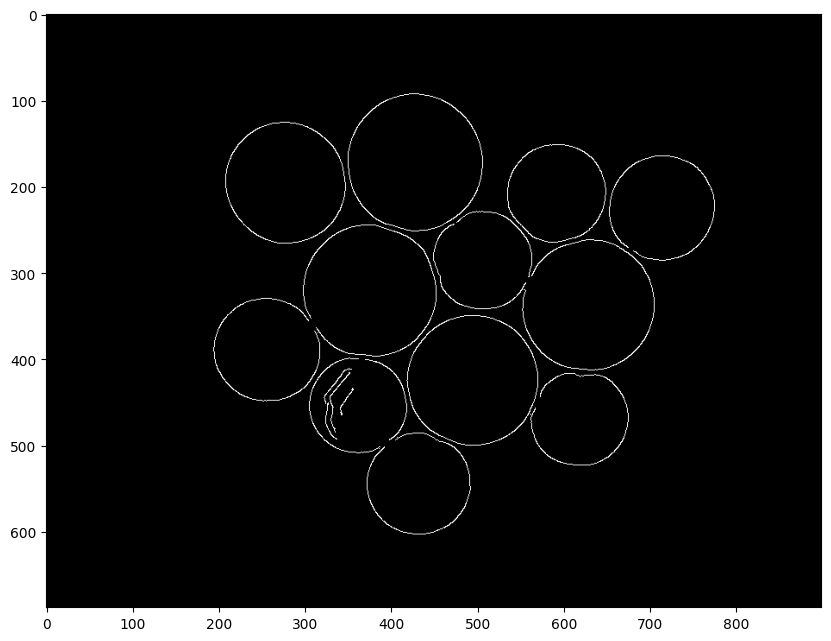

In [6]:
#Implemente seu código

import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('lab_images/coins.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# blur  
img_gray = cv2.GaussianBlur(img_gray,(15,15),0)
edges = cv2.Canny(img_gray,50,150)



"""
Detecta círculos em uma imagem usando a Transformada de Hough

Parâmetros:
imagem (ndarray): Imagem de entrada
dp (float): Resolução do acumulador
minDist (int): Distância mínima entre os centros dos círculos detectados
param1 (int): Limiar superior para o detector de bordas Canny
param2 (int): Limiar do acumulador para centros de círculos
minRadius (int): Raio mínimo dos círculos
maxRadius (int): Raio máximo dos círculos

Retorno:
ndarray: Imagem com círculos detectados
"""
# circles=cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,dp=2,minDist=100,param1=200,param2=100,minRadius=50,maxRadius=100)

bordas_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
output = bordas_rgb

# # print(len(circles[0]))
# if circles is not None:        
#     circles = np.uint16(np.around(circles))
#     for i in circles[0,:]:
#         # desenha o contorno do circulo
#         cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),2)
#         # desenha no centro do circulo
#         cv2.circle(output,(i[0],i[1]),2,(0,0,255),3)
        
plt.figure(figsize = (10,10))
plt.imshow(output, cmap="Greys_r", vmin=0, vmax=255); plt.show()







### Transformada de Hough para Detecção de Linhas


A detecção de retas pode ser realizada utilizando a **Transformada de Hough para Linhas**, implementada nas funções **cv2.HoughLines()** e **cv2.HoughLinesP()**. A versão probabilística (**HoughLinesP**) melhora a estimativa das linhas detectadas ao considerar apenas pontos significativos.

### Representação Paramétrica de Linhas

Uma linha no plano cartesiano pode ser representada pela equação:

```
y = mx + b
```

Onde:
- `m` é a inclinação da linha
- `b` é o intercepto com o eixo y

No entanto, esta representação tem uma limitação: não consegue representar linhas verticais (onde m tenderia ao infinito). Por isso, na Transformada de Hough, utilizamos a representação em coordenadas polares:

```
ρ = x·cos(θ) + y·sin(θ)
```

Onde:
- `ρ` (rho) é a distância perpendicular da linha à origem
- `θ` (theta) é o ângulo entre o eixo x e a linha perpendicular à linha detectada

### Espaço de Parâmetros (Espaço de Hough)

Para cada ponto (x, y) na imagem original, podemos calcular todos os possíveis valores de ρ para diferentes valores de θ (geralmente de 0 a 180 graus). Isso gera uma curva senoidal no espaço de parâmetros (ρ, θ).

Pontos que pertencem à mesma linha na imagem original geram curvas senoidais que se intersectam em um único ponto no espaço de parâmetros. Este ponto de intersecção corresponde aos parâmetros (ρ, θ) da linha.

### Algoritmo Básico para Detecção de Linhas

1. **Pré-processamento**: Aplicar detecção de bordas (como o operador Canny) para obter uma imagem binária de bordas.
2. **Inicialização**: Criar uma matriz acumuladora para o espaço de parâmetros (ρ, θ).
3. **Votação**: Para cada ponto de borda (x, y) na imagem:
   - Para cada valor possível de θ, calcular ρ = x·cos(θ) + y·sin(θ)
   - Incrementar o acumulador na posição (ρ, θ)
4. **Extração**: Identificar os máximos locais no acumulador, que correspondem às linhas detectadas.
5. **Pós-processamento**: Filtrar e refinar as linhas detectadas conforme necessário.

#### Sintaxe:

```python
cv2.HoughLinesP(image, rho, theta, threshold, minLineLength=None, maxLineGap=None)
```

#### **Parâmetros:**
- **image**: Imagem de entrada em escala de cinza.
- **rho**: Resolução da distância no acumulador, em pixels.
- **theta**: Resolução angular no acumulador, em radianos (normalmente 1 grau = π/180).
- **threshold**: Limiar mínimo de votos no acumulador para validar uma linha.
- **minLineLength**: Comprimento mínimo para considerar um segmento como linha.
- **maxLineGap**: Distância máxima entre pontos para serem considerados na mesma linha.

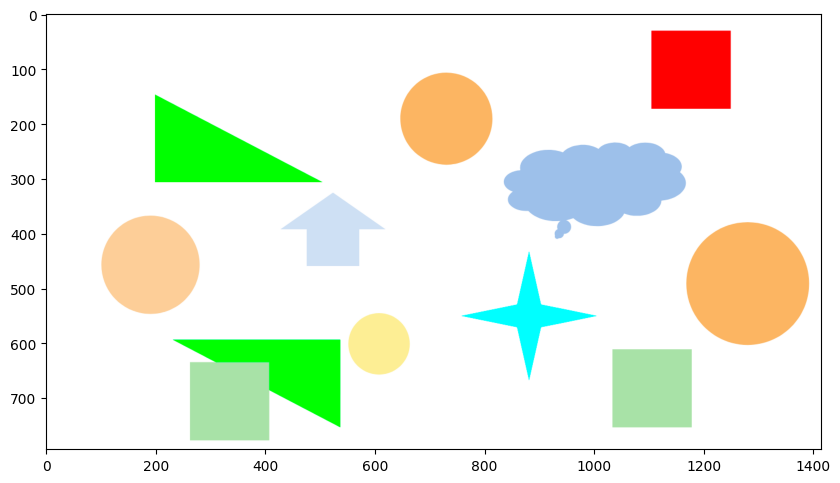

In [7]:
img = cv2.imread('lab_images/formas.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(img); plt.show()

35
[[199 306 500 306]]
[[234 594 537 594]]
[[281 189 504 307]]
[[1105  172 1105   30]]
[[537 753 537 595]]
[[1036  611 1177  611]]
[[1178  754 1178  612]]
[[1250  172 1250   31]]
[[262 776 262 637]]
[[198 305 198 149]]
[[1106   30 1249   30]]
[[476 459 571 459]]
[[263 635 407 635]]
[[1034  754 1034  612]]
[[430 391 523 326]]
[[263 778 407 778]]
[[407 777 407 636]]
[[1035  754 1177  754]]
[[1106  172 1249  172]]
[[199 147 319 210]]
[[408 686 534 753]]
[[431 392 474 392]]
[[525 326 618 391]]
[[ 904  530 1003  550]]
[[233 596 308 634]]
[[882 666 903 572]]
[[ 904  571 1001  552]]
[[859 530 881 435]]
[[571 458 571 394]]
[[883 437 903 529]]
[[760 551 860 529]]
[[573 392 616 392]]
[[475 458 475 393]]
[[763 552 860 572]]
[[859 571 881 666]]


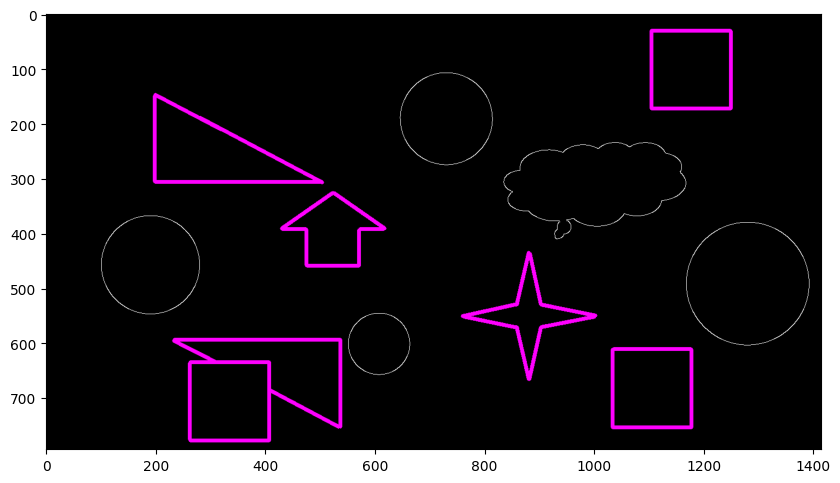

In [8]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(img_gray,50,150)


lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=30, maxLineGap=10)

hough_img_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

print(len(lines))
for line in lines:
    print(line)
    x1, y1, x2, y2 = line[0]
    cv2.line(hough_img_rgb, (x1, y1), (x2, y2), (255, 0, 255), 5)


plt.figure(figsize = (10,10))
plt.imshow(hough_img_rgb); plt.show()

### DESAFIO 3

Faça a alteração dos parametros para a transformada de Hough afim de detectar **todas** as linhas da imagem. 

Dica: Altere um parametro por vez e analise o resultado. 

In [9]:
#Implemente seu código






### Transformada de Hough e Filtragem por Ângulo

Para aplicações avançadas, podemos filtrar os resultados com base no **ângulo das linhas detectadas**.

## Cálculo do Ângulo de uma Reta

A Transformada de Hough detecta **linhas retas** identificando pontos alinhados em uma imagem de bordas. Cada linha detectada é representada por dois pontos:

- $ (x_1, y_1) $ - Primeiro ponto da linha
- $ (x_2, y_2) $ - Segundo ponto da linha

A partir desses pontos, podemos calcular o **ângulo da linha** usando a seguinte fórmula:

Cada linha detectada em `HoughLinesP` é representada por dois pontos $(x_1, y_1)$ e $(x_2, y_2)$. O **ângulo $\theta$**  da reta pode ser calculado com:

$$
\theta = \arctan \left( \frac{y_2 - y_1}{x_2 - x_1} \right)
$$

Para converter para graus:

$$
\theta_{graus} = \theta \times \frac{180}{\pi}
$$

## Filtro de Linhas por Ângulo
Podemos definir um intervalo de ângulos desejado para filtrar as linhas:

- **Linhas verticais**: $\theta \approx 90^\circ$
- **Linhas horizontais**: $\theta \approx 0^\circ$ ou $180^\circ$
- **Linhas inclinadas**: qualquer outro intervalo necessário.


### pseudocódigo

```python
    for line in lines:
        x1, y1, x2, y2 = line[0]
        
        # Calcular o ângulo da linha
        angle_radianos = np.arctan2(y2 - y1, x2 - x1)
        angle_graus = np.degrees(angle_radianos)

    
```

### DESAFIO 4

![](lab_images/rua.png)

Você recebeu a imagem de uma rodovia e precisa detectar as **linhas das faixas de trânsito** usando técnicas de processamento de imagem com a **Transformada de Hough**.

Note que o seu sistema deve ser inteligente o suficiente para detectar **apenas as faixas de trânsito**, ignorando outros segmentos de reta que possam aparecer na imagem. Para isso, será necessário um pipeline de processamento de imagem adequado. Crie e aplique uma máscara para isolar a estrada.


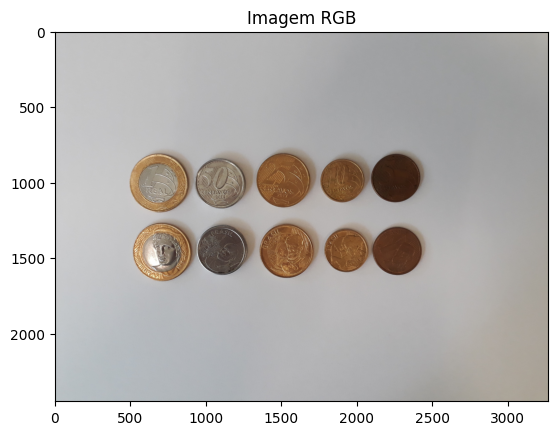

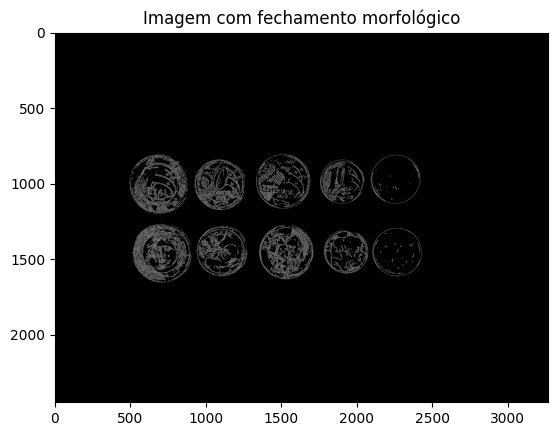

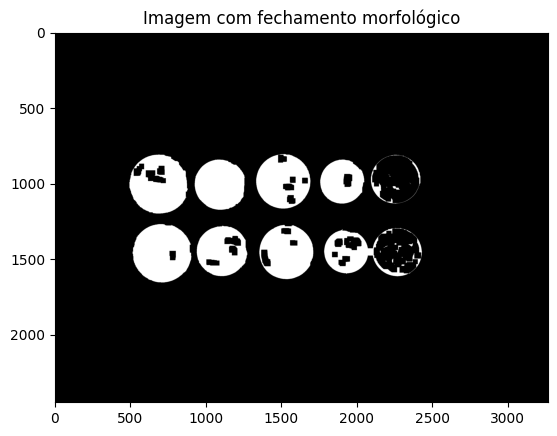

In [10]:
#Implemente seu código

import cv2
from matplotlib import pyplot as plt
import numpy as np


img = cv2.imread('lab_images/moeda1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(img_gray,50,150)

# binarize the image 
# binr = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1] 

# kernel = np.ones((5,5),np.uint8)

# dilation = cv2.dilate(edges,kernel,iterations = 7)

# imgf = cv2.dilate(edges,kernel,iterations = 1)




kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (33,33))
imgf = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)





# lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=30, maxLineGap=10)

# hough_img_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

# print(len(lines))
# for line in lines:
#     x1, y1, x2, y2 = line[0]
#     cv2.line(hough_img_rgb, (x1, y1), (x2, y2), (255, 0, 255), 5)

# plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title('Imagem RGB'); plt.show()
plt.imshow(edges, cmap='gray'); plt.title('Imagem com fechamento morfológico'); plt.show()
plt.imshow(imgf, cmap='gray'); plt.title('Imagem com fechamento morfológico'); plt.show()

    






## **MORFOLOGIA MATEMÁTICA**


A morfologia matemática é um conjunto de técnicas de processamento de imagens baseadas na teoria dos conjuntos. Estas operações são fundamentais para:

- Extração de componentes de imagens úteis para representação e descrição de formas
- Pré-processamento e pós-processamento em tarefas de visão computacional
- Filtragem, afinamento e poda de regiões

As operações morfológicas trabalham com dois elementos principais:
1. **Imagem**: Geralmente binária (0s e 1s) ou em escala de cinza
2. **Elemento Estruturante**: Uma pequena matriz que define como a operação afetará a imagem

## Operações Básicas

As duas operações fundamentais da morfologia matemática são:

- **Dilatação**: Expande as regiões claras (1s) da imagem
- **Erosão**: Reduz as regiões claras da imagem

A partir destas operações básicas, podemos criar operações compostas como:

- **Abertura**: Erosão seguida de dilatação (remove pequenos objetos)
- **Fechamento**: Dilatação seguida de erosão (preenche pequenos buracos)

#### **DILATAÇÃO BINÁRIA**

É uma transformação morfológica que combina dois conjuntos usando adição vetorial. Como o nome diz, o resultado será uma imagem “engordada”.

![](lab_images/dilatação.gif)

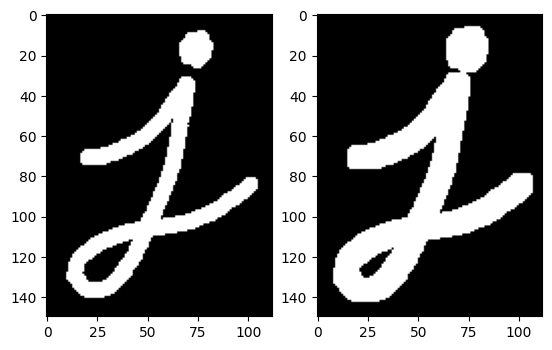

In [11]:

img = cv2.imread('lab_images/j.png',0)


kernel = np.ones((5,5),np.uint8)

dilation = cv2.dilate(img,kernel,iterations = 1)



plt.subplot(121),plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.subplot(122),plt.imshow(dilation, cmap="gray", vmin=0, vmax=255)
plt.show()

## Detectando contorno com dilatação

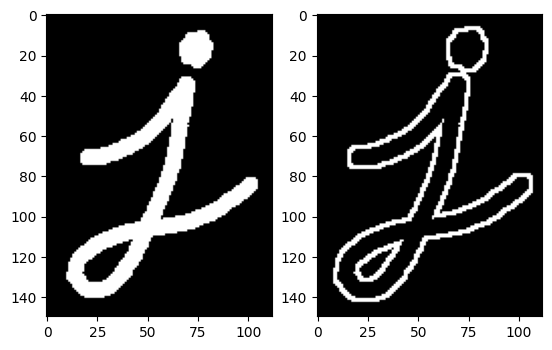

In [12]:

img = cv2.imread('lab_images/j.png',0)

dst = img.copy()
kernel = np.ones((5,5),np.uint8)

dilation = cv2.dilate(img,kernel,iterations = 1)

dst = dilation - img

plt.subplot(121),plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.subplot(122),plt.imshow(dst, cmap="gray", vmin=0, vmax=255)
plt.show()

# Elementos Estruturantes

## O que é um Elemento Estruturante?

O elemento estruturante (também chamado de kernel ou máscara) é uma matriz pequena que define como as operações morfológicas afetarão a imagem. Ele funciona como uma "sonda" que examina cada pixel da imagem e sua vizinhança para determinar o valor do pixel na imagem de saída.

Características importantes:
- Possui uma **origem** (ponto central)
- Tem uma **forma** específica (retângulo, círculo, cruz, etc.)
- Possui um **tamanho** que determina sua área de influência

## Importância do Elemento Estruturante

A escolha do elemento estruturante é impacta o resultado da operação morfológica:
- **Forma**: Influencia a direção e o padrão da transformação
- **Tamanho**: Determina a escala da transformação (objetos menores que o elemento estruturante podem ser removidos)
- **Orientação**: Pode ser usado para detectar características direcionais

### Dicas para escolher o Elemento Estruturante

**OpenCV oferece três formas básicas**:
- Retangular: `cv2.MORPH_RECT`
- Elíptico: `cv2.MORPH_ELLIPSE`
- Cruz: `cv2.MORPH_CROSS`

- **Retangular**: Bom para operações gerais, preserva bordas horizontais e verticais
- **Elíptico**: Produz resultados mais suaves, sem cantos acentuados
- **Cruz**: Preserva linhas finas horizontais e verticais

**Experimentação** é fundamental para encontrar o elemento estruturante ideal para cada aplicação

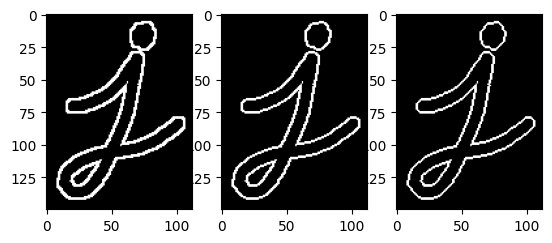

In [13]:

img = cv2.imread('lab_images/j.png',0)

# Criar e visualizar elementos estruturantes de tamanho 5x5
tamanho = (5, 5)

# 1. Elemento estruturante retangular
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, tamanho)

# 2. Elemento estruturante elíptico
kernel_eliptico = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, tamanho)

# 3. Elemento estruturante em forma de cruz
kernel_cruz = cv2.getStructuringElement(cv2.MORPH_CROSS, tamanho)


# Aplicar operações morfológicas
img_dilated_rect = cv2.dilate(img, kernel_retangular, iterations=1)
img_dilated_ellipse = cv2.dilate(img, kernel_eliptico, iterations=1)
img_dilated_cross = cv2.dilate(img, kernel_cruz, iterations=1)
# contorno da imagem
border_diff_rect = img_dilated_rect - img
border_diff_ellipse = img_dilated_ellipse - img
border_diff_cross = img_dilated_cross - img



plt.subplot(131), plt.imshow(border_diff_rect, cmap="gray", vmin=0, vmax=255)
plt.subplot(132), plt.imshow(border_diff_ellipse, cmap="gray", vmin=0, vmax=255)
plt.subplot(133), plt.imshow(border_diff_cross, cmap="gray", vmin=0, vmax=255)
plt.show()


#### <b>EROSÃO BINÁRIA</b>

A erosão basicamente encolhe uma imagem e pode ser vista como uma transformação morfológica que combina dois conjuntos usando vetores
de subtração. Ela é expressa como a interseção de A e B. 

![](lab_images/erosao.gif)

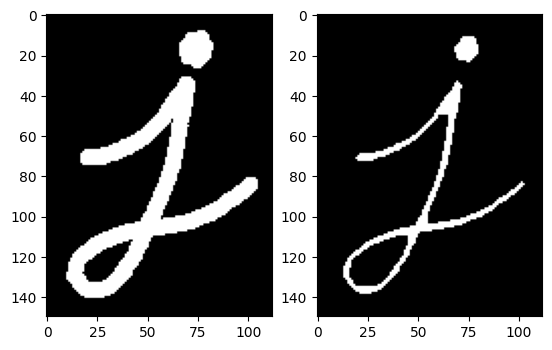

In [14]:

img = cv2.imread('lab_images/j.png',0)


dst = img.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

erode = cv2.erode(img,kernel,iterations = 1)

plt.subplot(121),plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.subplot(122),plt.imshow(erode, cmap="gray", vmin=0, vmax=255)
plt.show()

#### <b>ABERTURA BINÁRIA</b>

A abertura em geral suaviza o contorno de uma imagem, quebra
estreitos e elimina proeminências delgadas, a operação de abertura e
usada também para remover ruídos da imagem.

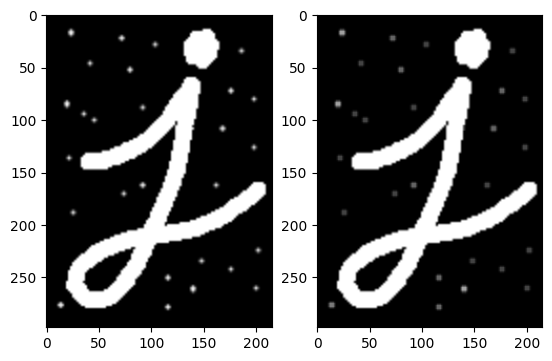

In [15]:

img = cv2.imread('lab_images/j-noise.png')

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)



plt.subplot(121),plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.subplot(122),plt.imshow(opening, cmap="gray", vmin=0, vmax=255)
plt.show()


#### <b>FECHAMENTO BINÁRIO</b>

O fechamento funde pequenos quebras e alargas golfos estreitos elimina
pequenos orifícios. Se uma abertura cria pequenos vazios na imagem, um
fechamento irá preencher ou fechar os vazios, estas operações podem
remover muitos dos pixels brancos com ruídos, ou seja basicamente ele e
igual a abertura só que primeiramente e feita a dilatação e após e feita a
erosão.

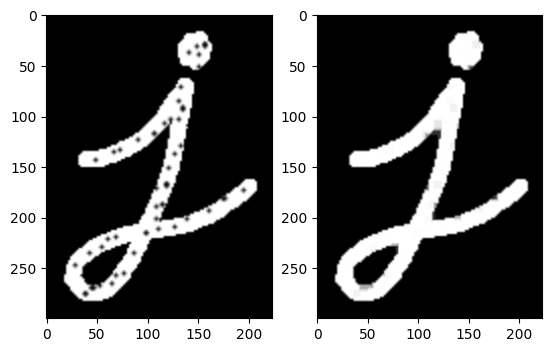

In [16]:

img = cv2.imread('lab_images/holes.png',0)


kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)


plt.subplot(121),plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.subplot(122),plt.imshow(closing, cmap="gray", vmin=0, vmax=255)
plt.show()

### DESAFIO 5

Utilizando a operação abertura e depois a operação de fechamento binário, é esperado que a imagem volte ao original? Por que? 

In [17]:
### seu código ###


cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)